In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('data collection/comments.csv')

data.head()

,comment,rate
0,من لب تاپ این برند رو خریدم شکل ظاهریش دقیقا ه...,0
1,قیمت بازار خیلی پایینتره,0
2,برای استفاده خانگی واقعا عالیه,5
3,به نسبت قیمت خوبه,4
4,خوبه کار راه اندازه ولی پیشنهاد می کنم \r\nلپ ...,3


In [ ]:
def label_data(rate : int) -> int:
  if rate >= 3:
    return 1
  else:
    return 0

In [ ]:
data['label'] = data['rate'].apply(label_data)

data.head()

,comment,rate,label
0,من لب تاپ این برند رو خریدم شکل ظاهریش دقیقا ه...,0,0
1,قیمت بازار خیلی پایینتره,0,0
2,برای استفاده خانگی واقعا عالیه,5,1
3,به نسبت قیمت خوبه,4,1
4,خوبه کار راه اندازه ولی پیشنهاد می کنم \r\nلپ ...,3,1


In [ ]:
! pip install -q shekar

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 124.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.7 MB/s eta 0:00:00


In [ ]:
from shekar import Normalizer
from shekar.preprocessing import SpacingNormalizer

In [ ]:
normalizer = Normalizer()
space_normalizer = SpacingNormalizer()

data['normalized'] = data['comment'].apply(normalizer)
data['normalized'] = data['normalized'].apply(space_normalizer)

data.head()

,comment,rate,label,normalized
0,من لب تاپ این برند رو خریدم شکل ظاهریش دقیقا ه...,0,0,من لب تاپ این برند رو خریدم شکل ظاهریش دقیقا ه...
1,قیمت بازار خیلی پایینتره,0,0,قیمت بازار خیلی پایینتره
2,برای استفاده خانگی واقعا عالیه,5,1,برای استفاده خانگی واقعا عالیه
3,به نسبت قیمت خوبه,4,1,به‌نسبت قیمت خوبه
4,خوبه کار راه اندازه ولی پیشنهاد می کنم \r\nلپ ...,3,1,خوبه کار راه‌اندازه ولی پیشنهاد می‌کنم\n لپ‌تا...


In [ ]:
! pip install -q sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

print("loading BGE-M3 model ...")
emb_model = SentenceTransformer("BAAI/bge-m3")

embeddings = emb_model.encode(data['normalized'].tolist(),
                              batch_size=32,
                              show_progress_bar=True)

embeddings.shape

loading BGE-M3 model ...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

(211, 1024)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embeddings,
                                                    data['label'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=data['label'])

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (168, 1024)
X_test shape: (43, 1024)
y_train shape: (168,)
y_test shape: (43,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(max_iter=3000)

model.fit(X_train, y_train)

score = f1_score(y_test, model.predict(X_test))

print(f"F1 score: {score}")

F1 score: 0.8947368421052632


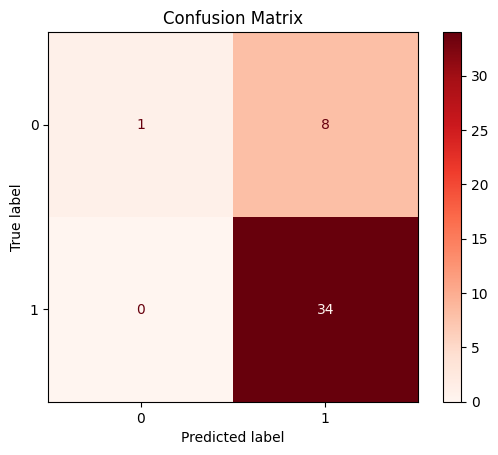

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

### Analysis



the model is very inaccurate in predicting negative comments

In [ ]:
! pip install -q keybert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.3 MB/s eta 0:00:00


searching for top keywords in positive and negative comments

In [ ]:
from keybert import KeyBERT

kw_model = KeyBERT(model='BAAI/bge-m3')

positive_comments = " ".join(data[data['label'] == 1]['normalized'].tolist())

keywords = kw_model.extract_keywords(positive_comments,
                                     keyphrase_ngram_range=(1, 3),
                                     top_n=10)

print(keywords)

[('لپ تاپ خوبیه', 0.6731), ('لپتاپ واقعا خوبیه', 0.6706), ('لپتاپ خوبیه نسبت', 0.6663), ('لپ تاپ خوبی', 0.6655), ('لپ تاپ واقعا', 0.6618), ('عالی لپ تاپ', 0.659), ('کاملا مناسبه ویندوز', 0.6575), ('لپتاپ خوبیه', 0.6545), ('خوبه ویندوز ۱۱', 0.6533), ('خوبه لپ تاپ', 0.6513)]


In [ ]:
from numpy import negative
from keybert import KeyBERT

kw_model = KeyBERT(model='BAAI/bge-m3')

negative_comments = " ".join(data[data['label'] == 0]['normalized'].tolist())

keywords = kw_model.extract_keywords(negative_comments,
                                     keyphrase_ngram_range=(1, 1),
                                     top_n=20)

print(keywords)

[('لپتاپ', 0.5773), ('لپتاب', 0.5561), ('قیمتش', 0.5238), ('لپ', 0.5199), ('خریدم', 0.518), ('مادربورد', 0.4951), ('خریدید', 0.494), ('لنوو', 0.494), ('cpu', 0.4886), ('۴۰تومن', 0.4855), ('خرید', 0.4854), ('مانیتور', 0.485), ('مشکل', 0.4826), ('شارژ', 0.4798), ('معمولی', 0.4778), ('باطری', 0.4758), ('کیبورد', 0.4723), ('نصب', 0.4717), ('لوازم', 0.4707), ('پشتیبانی', 0.4707)]


حتی با توجه به اینکه داده های کافی برای نظرات منفی در اختیار نداریم نتایج زیر با توجه به استخراج کلمات
کلیدی نتیجه گیری میشود.
به طور کلی با توجه به حجم کم داده ها و شباهت زیاد نظرات منفی و مثبت استفاده از این embedding برای
استخراج کلمات کلیدی مناسب نیست

## تحلیل کلمات کلیدی استخراج شده از نظرات

### کلمات کلیدی نظرات مثبت:
کلمات کلیدی استخراج شده از نظرات مثبت (با `ngram_range=(1, 3)`):

*   **لپ تاپ خوبیه / لپتاپ خوبیه / لپتاپ واقعا خوبیه:**
*   **عالی لپ تاپ / کاملا مناسبه ویندوز:**

شاخصه اصلی در نظرات مثبت وجود کلمات کلیدی مثل خوب و عالی و مناسب است.

### کلمات کلیدی نظرات منفی:
کلمات کلیدی استخراج شده از نظرات منفی (با `ngram_range=(1, 1)`):

*   **لپتاپ / لپتاب / لپ:**
*   **قیمتش / خرید / خریدم / خریدید:** پس از خرید برآورده نشده است.
*   **مادربورد / cpu / مانیتور / باطری / کیبورد:**
*   **مشکل / شارژ / نصب / پشتیبانی:**
**نتیجه‌گیری از نظرات منفی:**

*** بطور کلی مشاهده نبود کلمات مثبت در کامنت های منفی هستیم بطوریکه خود کلمات منفی هم حضور چشمگیری ندارند
